In [10]:
import json
import pandas as pd
from matplotlib import pylab as plt

.загружаем файлы .json

In [11]:
path = 'task_data/Sessions_Page.json'
path2 = 'task_data/Goal1CompletionLocation_Goal1Completions.json'

with open(path, 'r') as f:
    sessions_page = json.loads(f.read())

with open(path2, 'r') as f:
    goals_page = json.loads(f.read())

Смотрим, где именно в файле интересующие нас данные

In [12]:
type (sessions_page)
sessions_page.keys()
sessions_page['reports'][0].keys()
sessions_page['reports'][0]['data']['rows']

[{'dimensions': ['/'], 'metrics': [{'values': ['5925']}]},
 {'dimensions': ['/?_hsenc=p2ANqtz-_McBb_ag9eyaYD3mJjDG7G_uB3uhgGcsBxi15N7Dkx2CB6Q4EicvyM4qxz_QhoX49gt27HZU9461DeUyoMURHz597MYA&_hsmi=42202727'],
  'metrics': [{'values': ['1']}]},
 {'dimensions': ['/?_hsenc=p2ANqtz-_ORc__Ui5VKSGvLO72LiNTFW98hg-mQlkIsltDFF4bZnKtFg4qvG21fhsL8zvY5rcQaRGke58VTsOsZTHhcAw7YWQMDvVnC8flaNVmXtZ3Pt9_sRI&_hsmi=45155107'],
  'metrics': [{'values': ['1']}]},
 {'dimensions': ['/?_hsenc=p2ANqtz-_PMnaFvC1MTCPb_RghCCNcPyb6VHPUfs1AGacdBEc6k4WIkLbn_u24M5CG820anvWE4-jQa-2c2IEUNpl9Xqln0NruPA&_hsmi=42202727'],
  'metrics': [{'values': ['1']}]},
 {'dimensions': ['/?_hsenc=p2ANqtz--3SZ9_TxAeV_6dUflCeBmtEy9p5-kx7gJidd5Ibv-WOsLnzj_uCiZtdhRikZqTRif43CkxFcza6g657KSMlorVQiMBEg&_hsmi=45145424'],
  'metrics': [{'values': ['1']}]},
 {'dimensions': ['/?_hsenc=p2ANqtz--5qSlXatRwmauQbFfrahRUIfDCf0Sr03obAlY44VJRH5EId-A3BprJhTJXbEJ4KaVk0DPxxpp6r6sXB9RVDtgZeDJXeQ&_hsmi=45155107'],
  'metrics': [{'values': ['1']}]},
 {'dimensions':

Считываем нужные нам данные как датафреймы

In [13]:
sessions_df = pd.DataFrame(sessions_page['reports'][0]['data']['rows'])
goals_df = pd.DataFrame(goals_page['reports'][0]['data']['rows'])
#sessions_df
goals_df

,dimensions,metrics
0,[(entrance)],[{'values': ['6']}]
1,[/],[{'values': ['85']}]
2,[/portfolio-single-gallery.html],[{'values': ['1']}]
3,[/TMRW_Byte_Cafe.php],[{'values': ['22']}]
4,[/TMRW_FAQs.php],[{'values': ['24']}]
5,[/TMRW_Get_in_touch.php],[{'values': ['3']}]
6,[/TMRW_the_team.php],[{'values': ['5']}]


Создаем в датафреймах отдельные столбцы с данными в удобных нам форматах.

In [14]:
x=[]
for i in sessions_df.dimensions:
    x.append(str(i[0]))

sessions_df.insert(2, 'name', x)

x=[]
for i in goals_df.dimensions:
    x.append(str(i[0]))
    
goals_df.insert(2, 'name', x)

In [15]:
x=[]
for i in sessions_df.metrics:
    x.append(float(i[0]['values'][0]))

sessions_df.insert(3, 'sessions', x)

x=[]
for i in goals_df.metrics:
    x.append(float(i[0]['values'][0]))

goals_df.insert(3, 'goals', x)

Создаем столбцы в датафрейме с "Goal1Complitations", где будем хранить количество сессий и конверсию

In [16]:
goals_df.insert(4, 'sessions', 0)
goals_df.insert(5, 'convers_rate', 0)


Переносим из таблицы сессий количество сессий и считаем конверсию для каждой страницы, которая есть в "Goal1Complitations"

In [17]:
for i in range(7):
    goals_df.sessions[i] = sum(sessions_df.sessions[sessions_df.name==goals_df.name[i]])
goals_df.convers_rate = goals_df.goals/goals_df.sessions*100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Обнулим конверсию для тех страниц по которым не було сессий. В даннос случае это страница "(entrance)"

In [18]:
goals_df.convers_rate[goals_df.sessions==0] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
goals_df.ix[range(1,7),[2,5]]

,name,convers_rate
1,/,1.434599
2,/portfolio-single-gallery.html,50.000000
3,/TMRW_Byte_Cafe.php,8.148148
4,/TMRW_FAQs.php,18.604651
5,/TMRW_Get_in_touch.php,75.000000
6,/TMRW_the_team.php,3.571429


Строим график

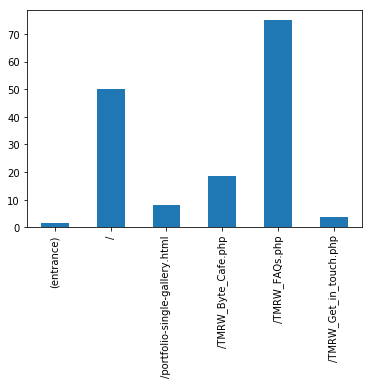

In [20]:
goals_df.ix[range(1,7),[2,5]].plot(kind="bar", legend=False)
plt.xticks([0, 1, 2, 3, 4, 5], goals_df.name, rotation="vertical")
plt.show()

Выводим результат

In [22]:
name = goals_df.ix[goals_df.convers_rate==max(goals_df.convers_rate),2]
print ('The best converting page on your site is "',str(name)[5:len(name)-28], '" with conversion rate', max(goals_df.convers_rate),'%')

The best converting page on your site is " /TMRW_Get_in_touch.ph " with conversion rate 75.0 %
